In [3]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [43]:
config_file = 'configs/heron/grid_search_segformer/segformer_mit-b0_dice_640x640_cracks.py'
checkpoint_file = 'work_dirs/segformer_mit-b0_dice_640x640_cracks/latest.pth'

In [44]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: work_dirs/segformer_mit-b0_dice_640x640_cracks/latest.pth


In [45]:
from pathlib import Path
test = Path('/home/innovation/Projects/heron/mmsegmentation/cracks_and_potholes/test/')

In [46]:
pallete = [[100,100,100], [30,255,255]]

### test a single image

#### RAW

In [47]:

img = test/'dam01_RAW.png'
result = inference_segmentor(model, img)

####  or cropped image

In [53]:
# test a single CROPPED image
import numpy as np
img_list = os.listdir(test)
img = test/img_list[5]

# Importing Image class from PIL module
from PIL import Image

im = Image.open(img)
width, height = im.size

left = 0
top = 0
right = 640 if width>640 else width
bottom = 640 if height>640 else height
 
im1 = np.array(im.crop((left, top, right, bottom)))

im1[:2]
result = inference_segmentor(model, im1[:,:,:3])

#TODO needs RGB conversion

#### show the results

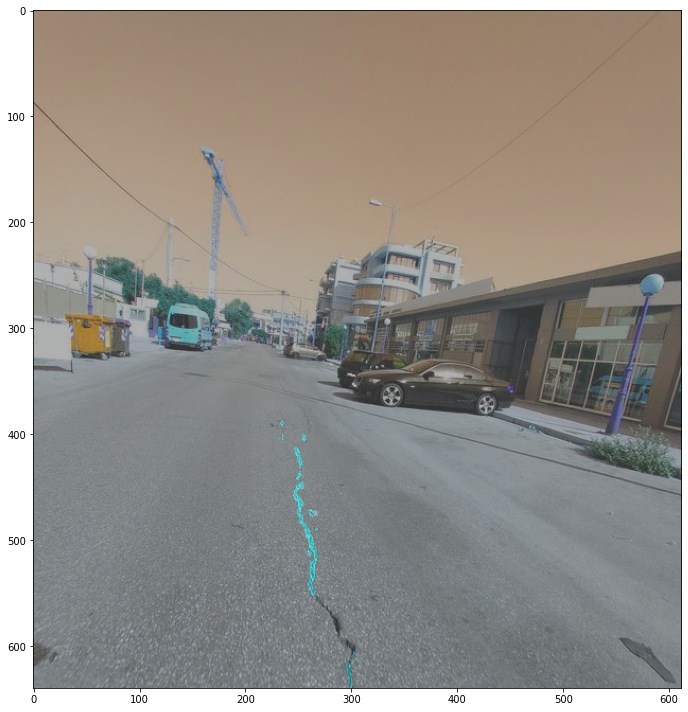

In [49]:
show_result_pyplot(model, im1[:,:,:3], result, pallete)

### TES

In [50]:
# test multiple images
import os
results = []
images = os.listdir(test)
for img in images:  
    img_path = test/img
    results.append(inference_segmentor(model, img_path))

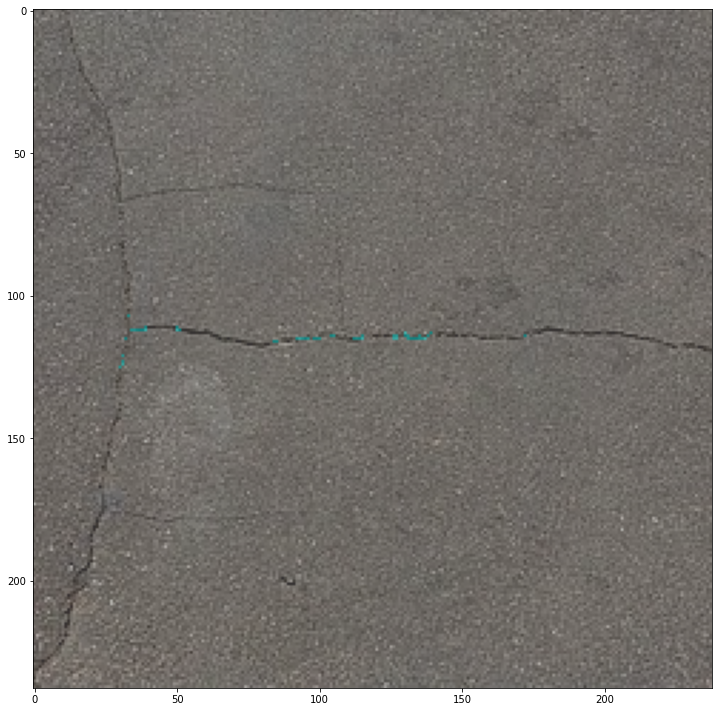

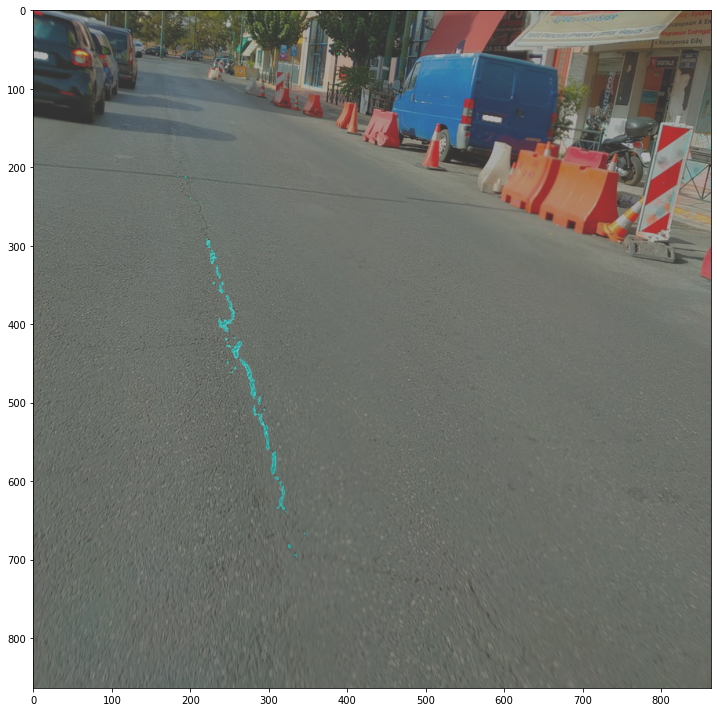

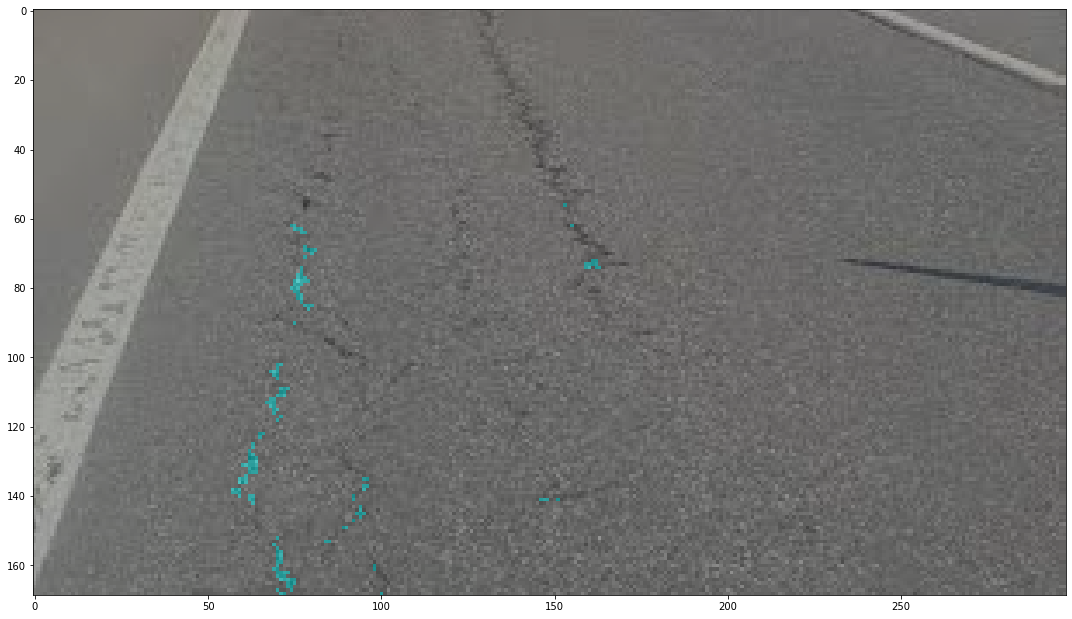

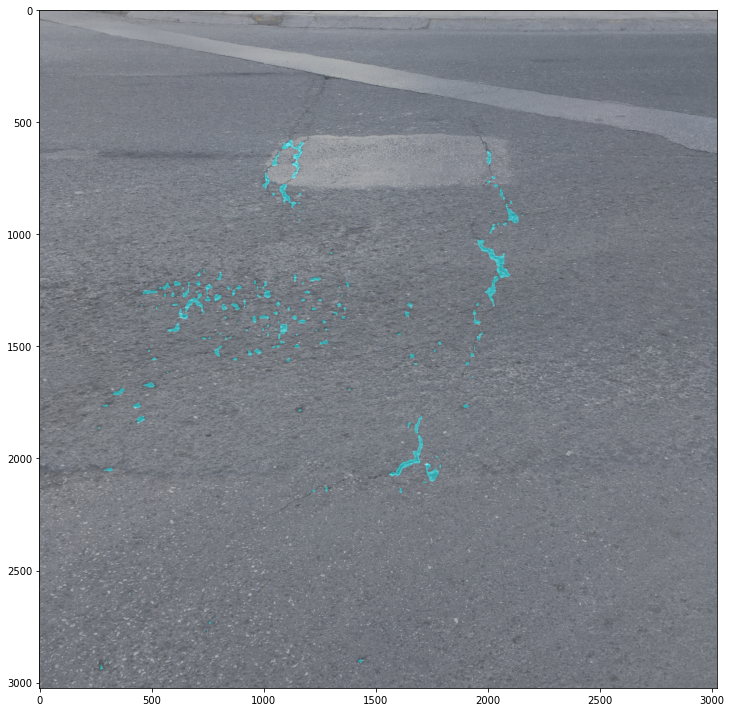

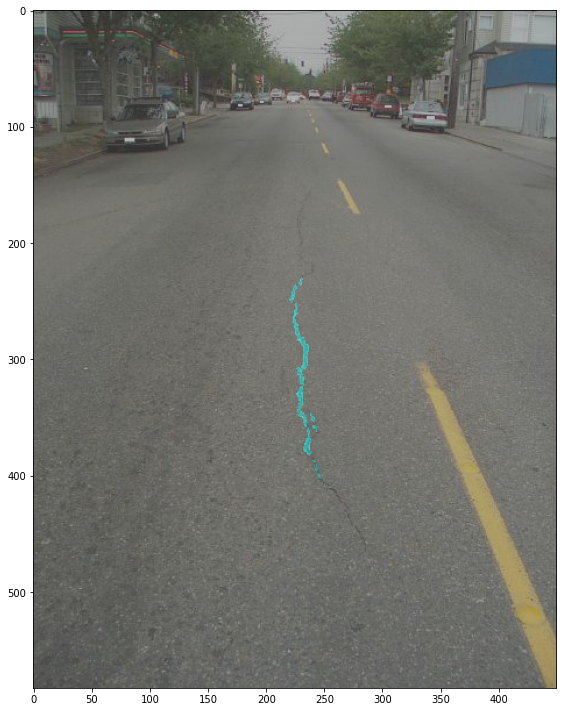

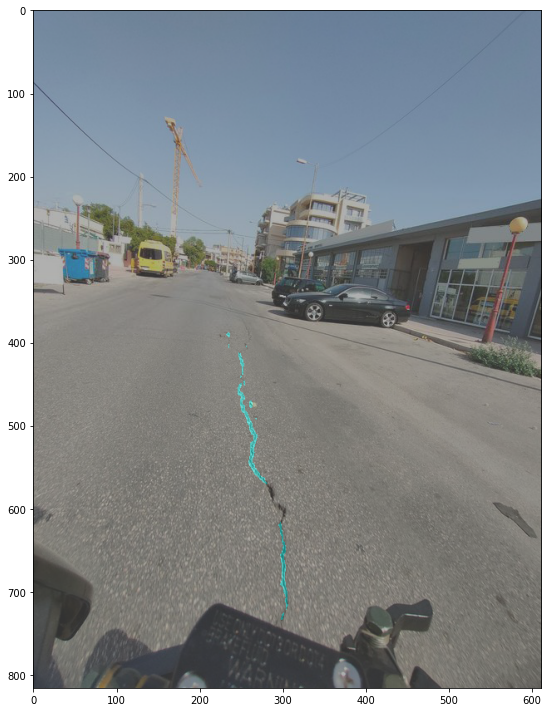

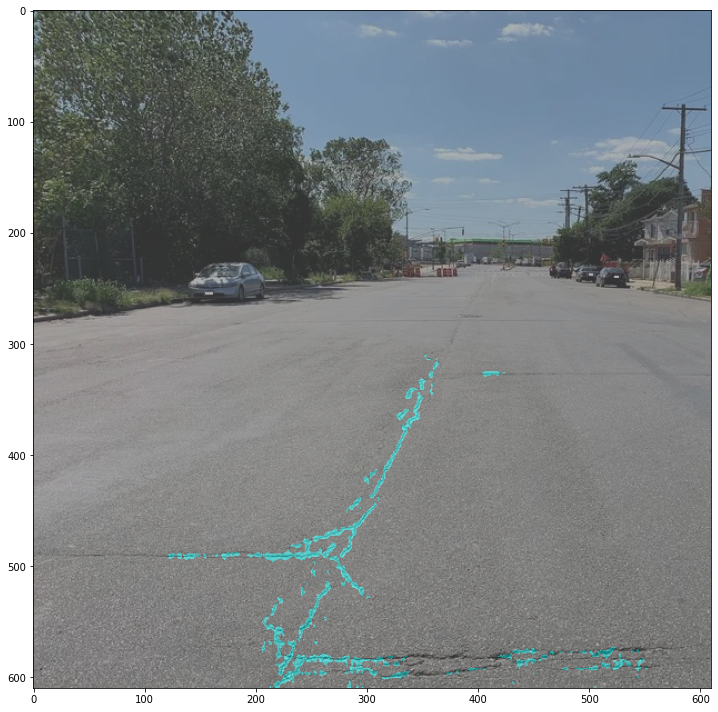

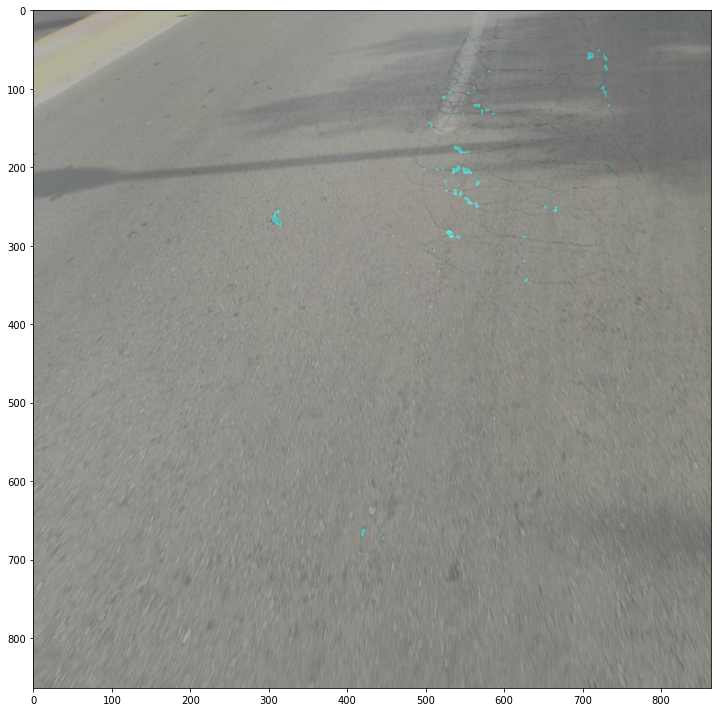

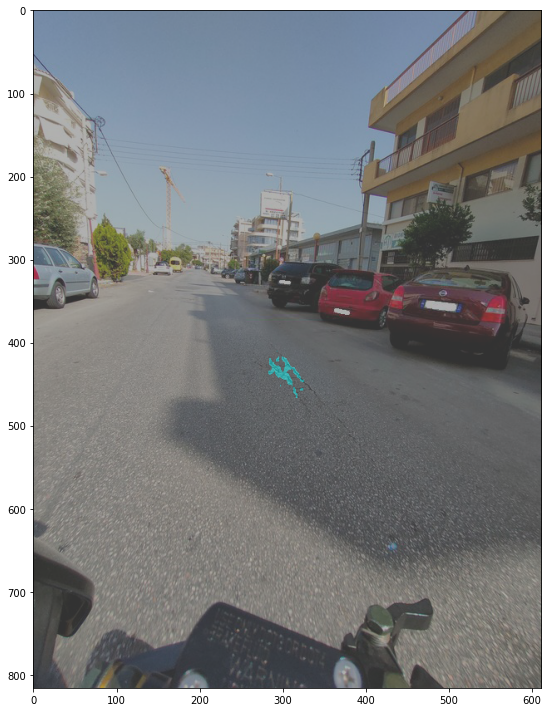

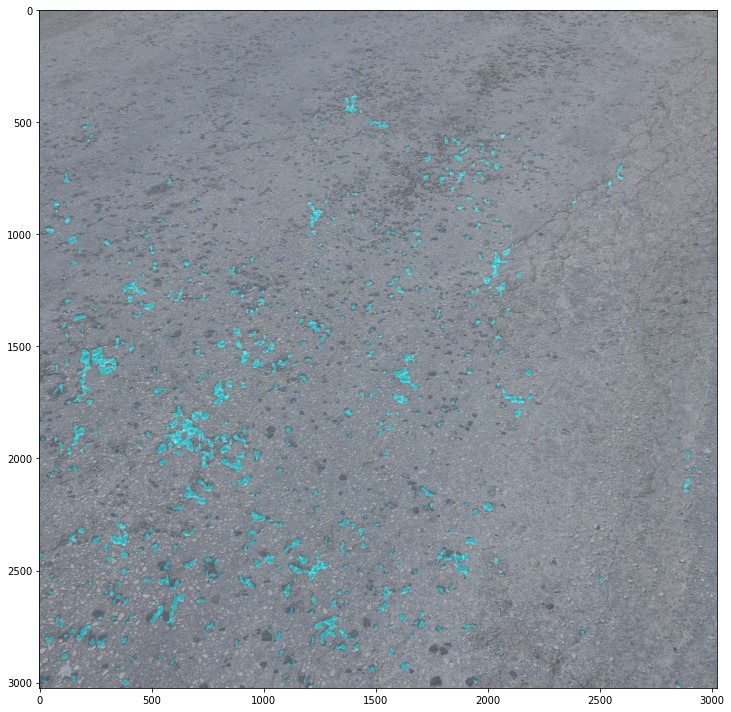

In [51]:
# show the results
for r, i in zip(results, images):
    show_result_pyplot(model, test/i, r, pallete)